In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("zomato_data.csv")

In [3]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# convert the data type of column - rate

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data['rate']=data['rate'].apply(handleRate)
print(data.head())
    

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# 1).What  type of restaurant do the majority of customers orders from?

In [6]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

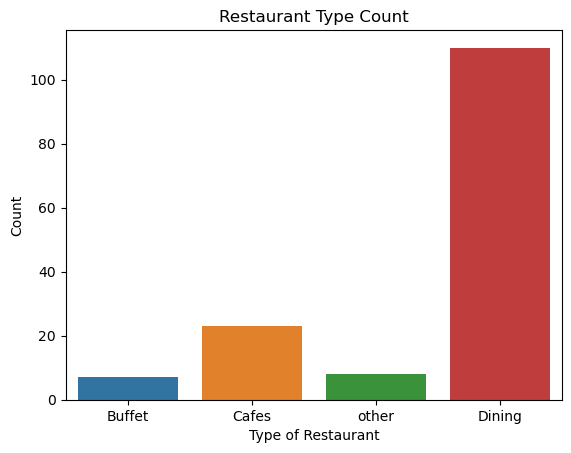

<Figure size 800x400 with 0 Axes>

In [7]:
sns.countplot(data=data, x="listed_in(type)")
plt.xlabel("Type of Restaurant")  
plt.ylabel("Count")
plt.title("Restaurant Type Count")
plt.figure(figsize=(8,4))

plt.tight_layout()
plt.show()



In [8]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

 conclusion:- majority of the  restaurant falls in  Dining category

# 2).How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'votes')

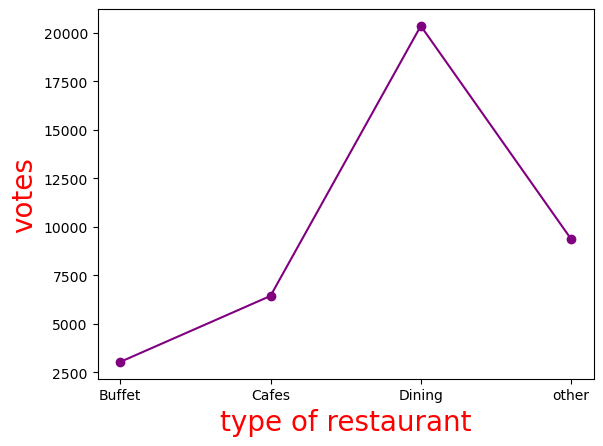

In [9]:
groupdata=data.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({'votes':groupdata})
plt.plot(result,c="purple",marker="o")
plt.xlabel("type of restaurant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)

conclusion:- Dining restaurant has received maximum votes

# 3).What are the ratings that the majority restaurants have recevied?

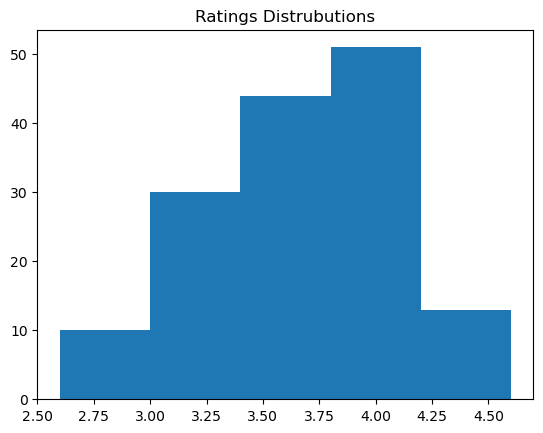

In [10]:
plt.hist(data['rate'],bins=5)
plt.title("Ratings Distrubutions")
plt.show()

conclusion:- the majority restuarants recevied ratings 3.5 to 4 

# 4).Zomato has observed that most couple order most of their food online.What is their avreage spending of each order?

In [11]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

NameError: name 'ax' is not defined

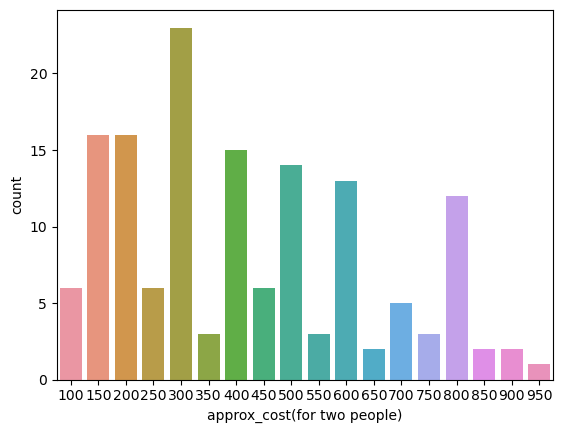

In [12]:
sns.countplot(data=data,x="approx_cost(for two people)")
for bars in ax.containers:
    ax.bar_label


conclusion:- the majority of couple restuarants with an the approximate cost of 300 rupees

# 5).Which mode(online or offline)has recevied the maximum ratings? 

In [ ]:
data

<Axes: xlabel='online_order', ylabel='rate'>

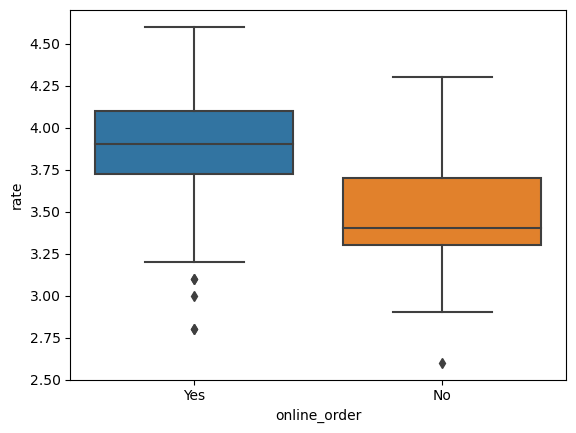

In [13]:
sns.boxplot(data=data,x="online_order",y="rate")

conclusion:- offline order recevied lower ratings in comparison to online order

# 6).Which type of restaurant received most offline order,so that zomato can proved customers with some good offers?

In [14]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


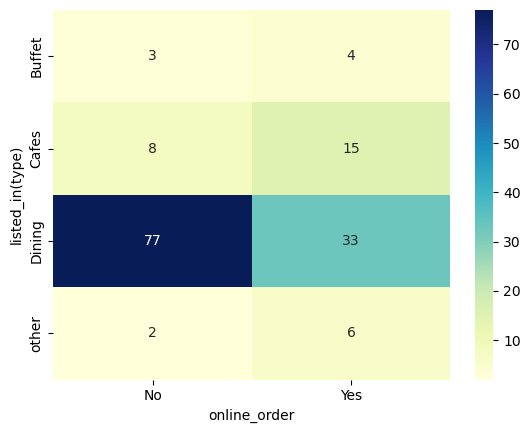

In [25]:

# Crosstab 
table = pd.crosstab(data['listed_in(type)'], data['online_order'])

# Heatmap
# plt.figure(figsize=(12, 6))
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


conclusion:- Dining restaurants primarily accept offline orders whereas cafe primarily receive online.
this suggests that clients preference orders in persone at restaurants, but prefer online ordering at cafes